In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [5]:
import pickle

In [6]:
with open('df_unsw_train50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [7]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 209)
X teste =  (380959, 209)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [8]:
#X_train50_train.head()
X_train50_train

array([[1.40531784e-07, 2.88107071e-04, 1.67558916e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.76344888e-06, 1.33744095e-04, 2.94183243e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.76941473e-06, 2.95351543e-05, 6.02011348e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.02859494e-10, 7.94105563e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54289241e-10, 7.94105563e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.05094116e-06, 3.38679057e-04, 5.27210210e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

152963      Benign
627588      Benign
37398       Benign
486419      Benign
1203796     Benign
            ...   
110268      Benign
259178      Benign
131932     Generic
671155     Generic
121958      Benign
Name: Label_multiclass, Length: 888903, dtype: object
152963     0
627588     0
37398      0
486419     0
1203796    0
          ..
110268     0
259178     0
131932     1
671155     1
121958     0
Name: Label_binary, Length: 888903, dtype: int64


In [11]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [13]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [14]:
with open('df_unsw_test50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [15]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 209)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [16]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [18]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [21]:
#X_test50.head()
X_test50

array([[2.92892409e-08, 9.05558976e-06, 1.10523389e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.64863197e-08, 1.01701239e-05, 1.21439279e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.31433861e-10, 1.83898130e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.46883357e-07, 1.42660368e-04, 1.64420597e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.65139889e-05, 9.51672825e-04, 3.74016606e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.84637935e-07, 2.58864482e-03, 2.30598182e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [22]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']
[0 0 0 ... 0 0 0]


In [23]:
#X_test50.shape

In [24]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo LightBGM para Train e Validation - Train50

In [25]:
#!pip3 install lightgbm

In [26]:
import lightgbm as lgb

### Predição train50 binária

In [27]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [28]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [29]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [30]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9985457752671547

### Visualização da árvore binária

In [33]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [35]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

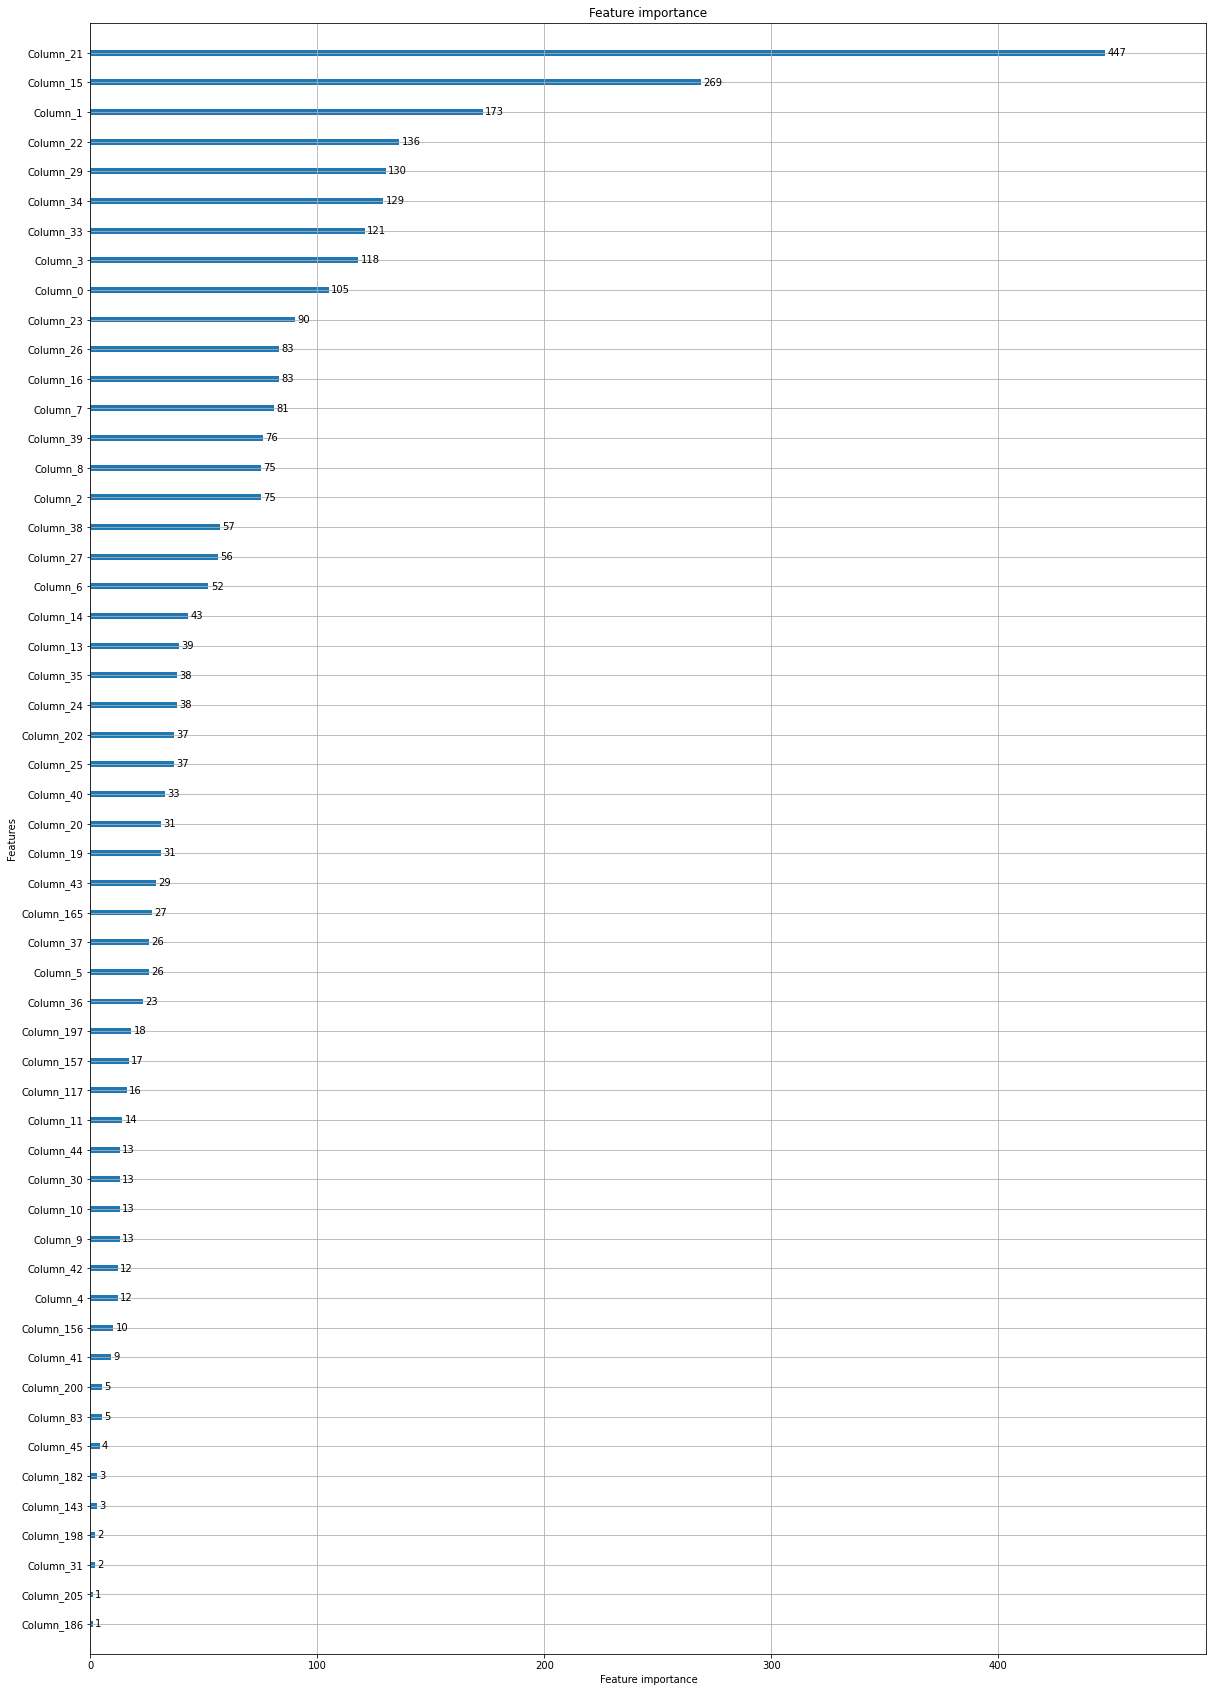

In [36]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [37]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [38]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [39]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [40]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [41]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [42]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9803102171099777

### Visualização da árvore multiclasse

In [43]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [44]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

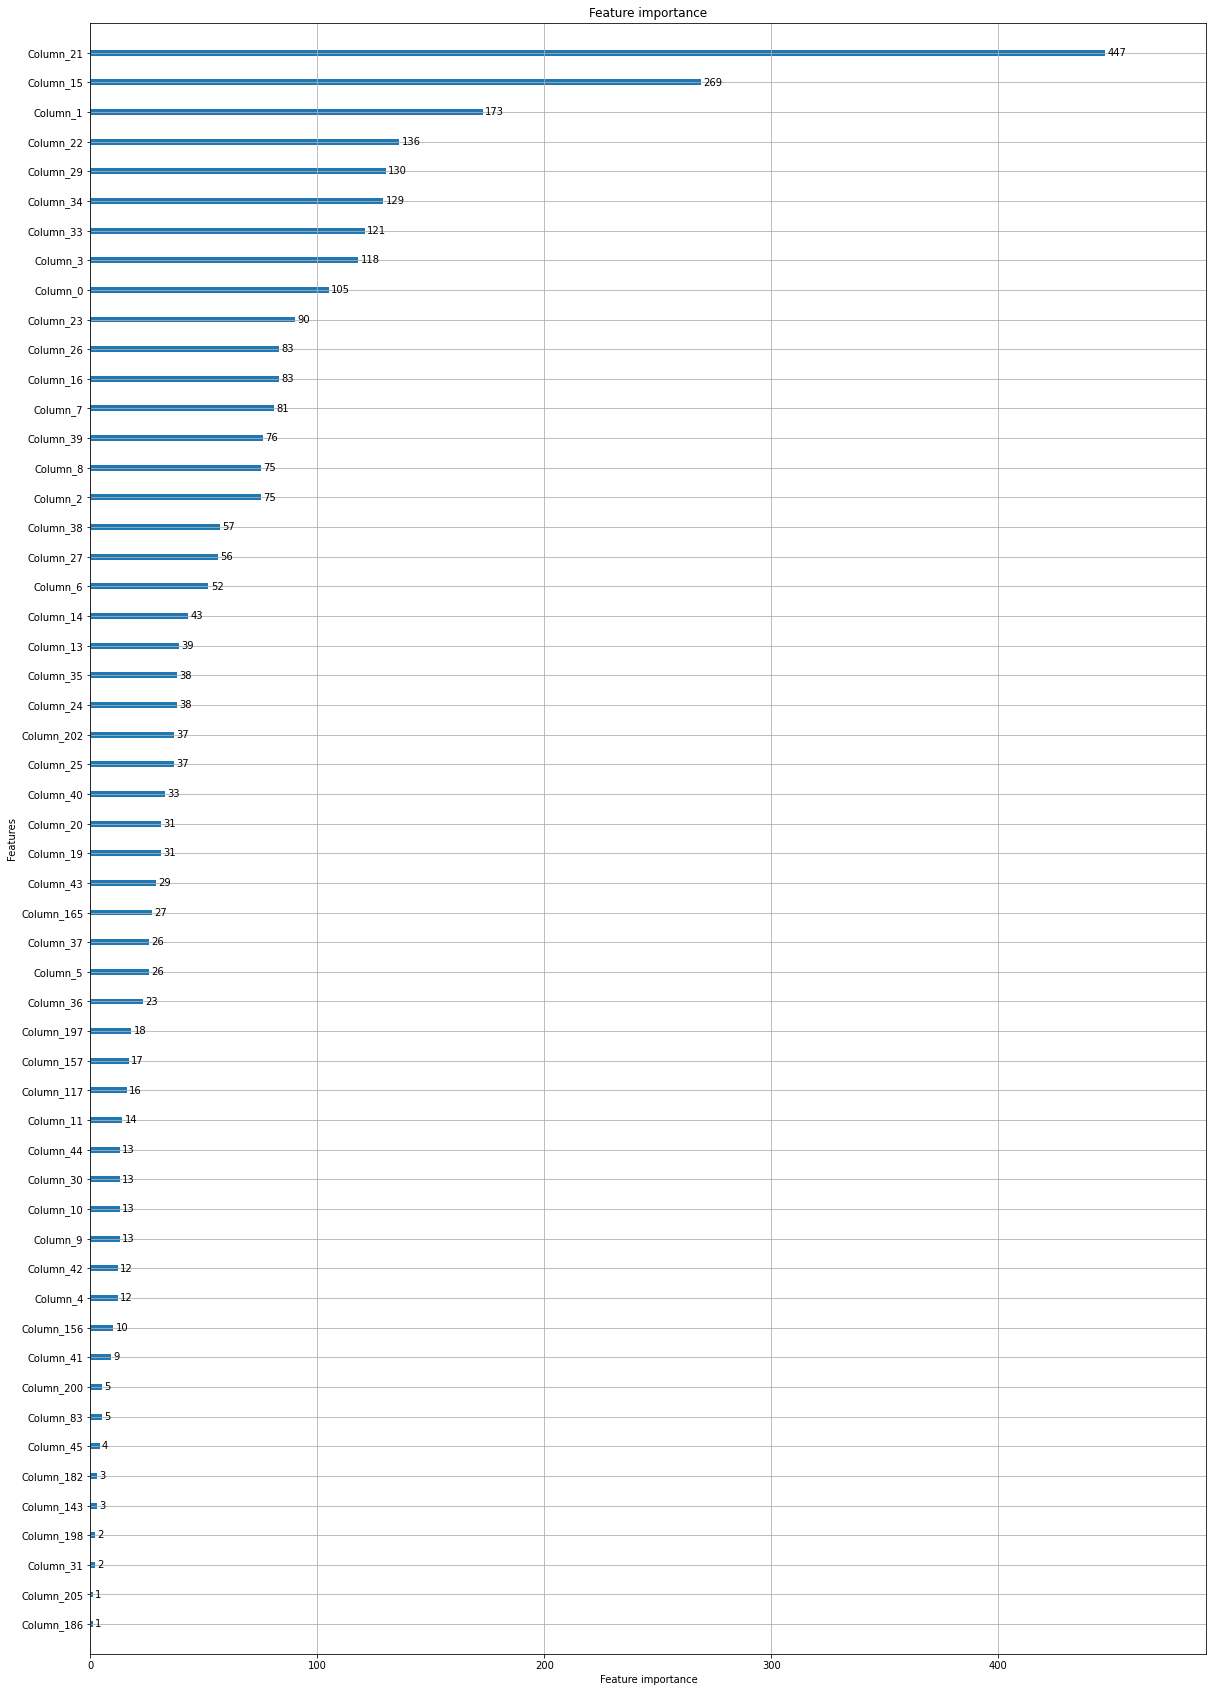

In [45]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [46]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [47]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999246  0.999090  0.999168    332789
           1   0.993717  0.994789  0.994253     48170

    accuracy                       0.998546    380959
   macro avg   0.996481  0.996939  0.996710    380959
weighted avg   0.998547  0.998546  0.998546    380959



In [48]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.019704  0.010256  0.013491       390
      Backdoor   0.063380  0.050992  0.056515       353
        Benign   0.997594  0.997858  0.997726    332789
           DoS   0.320997  0.356387  0.337767      2458
      Exploits   0.651584  0.702521  0.676095      6703
       Fuzzers   0.697013  0.670627  0.683566      3619
       Generic   0.991060  0.982462  0.986742     32272
Reconnaissance   0.775260  0.775260  0.775260      2118
     Shellcode   0.000000  0.000000  0.000000       229
         Worms   0.000000  0.000000  0.000000        28

      accuracy                       0.980310    380959
     macro avg   0.451659  0.454636  0.452716    380959
  weighted avg   0.979955  0.980310  0.980104    380959



### Cross Validation do train50

In [49]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [50]:
score_cv_train50_binary

array([0.99834629, 0.99862753, 0.99847004, 0.99822252, 0.99861627,
       0.99861627, 0.99848127, 0.99863877, 0.99867252, 0.99830127])

In [51]:
cv_result_train50_binary

[0.998499273884736]

In [52]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [53]:
score_cv_train50_multiclass

array([0.97833301, 0.97795052, 0.97608307, 0.9242097 , 0.97707279,
       0.979649  , 0.97355158, 0.97700529, 0.97897401, 0.98125773])

In [54]:
cv_result_train50_multiclass

[0.9724086709791806]

### Matriz de Confusão do train50

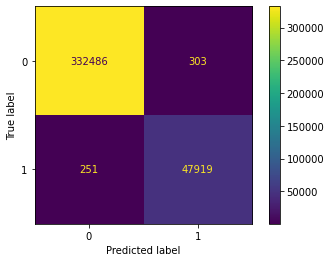

In [55]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

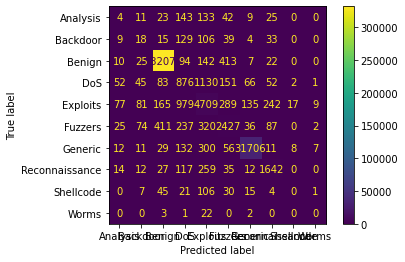

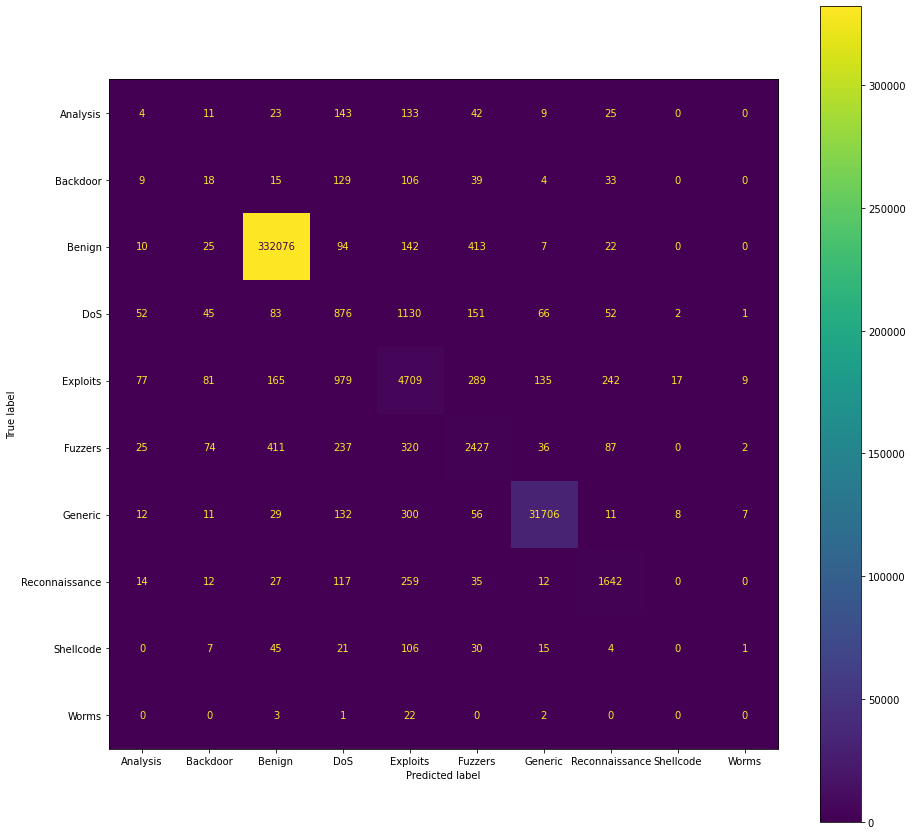

In [56]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [57]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [58]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.96943373463615

### Predição test50 multiclasse

In [61]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [62]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [63]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [64]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9234429828706067

### Precision e Recall do test50

In [65]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.965007  0.982192   1109226
           1   0.805393  1.000000  0.892208    160638

    accuracy                       0.969434   1269864
   macro avg   0.902696  0.982504  0.937200   1269864
weighted avg   0.975382  0.969434  0.970809   1269864



In [66]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.033639  0.008221  0.013213      1338
      Backdoor   0.002674  0.000859  0.001300      1164
        Benign   0.999657  0.952236  0.975371   1109226
           DoS   0.116071  0.058831  0.078084      8176
      Exploits   0.343772  0.110457  0.167194     22262
       Fuzzers   0.145407  0.189475  0.164542     12123
       Generic   0.596766  0.996473  0.746481    107740
Reconnaissance   0.687897  0.542114  0.606366      6993
     Shellcode   0.000000  0.000000  0.000000       755
         Worms   0.044444  0.022989  0.030303        87

      accuracy                       0.923443   1269864
     macro avg   0.297033  0.288165  0.278285   1269864
  weighted avg   0.935824  0.923443  0.923681   1269864



### Matriz de Confusão do test50

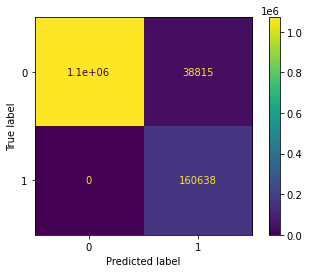

In [67]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

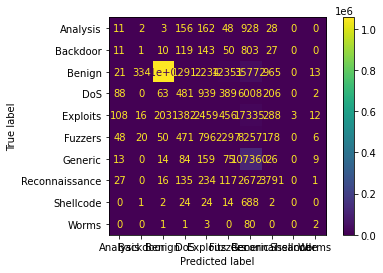

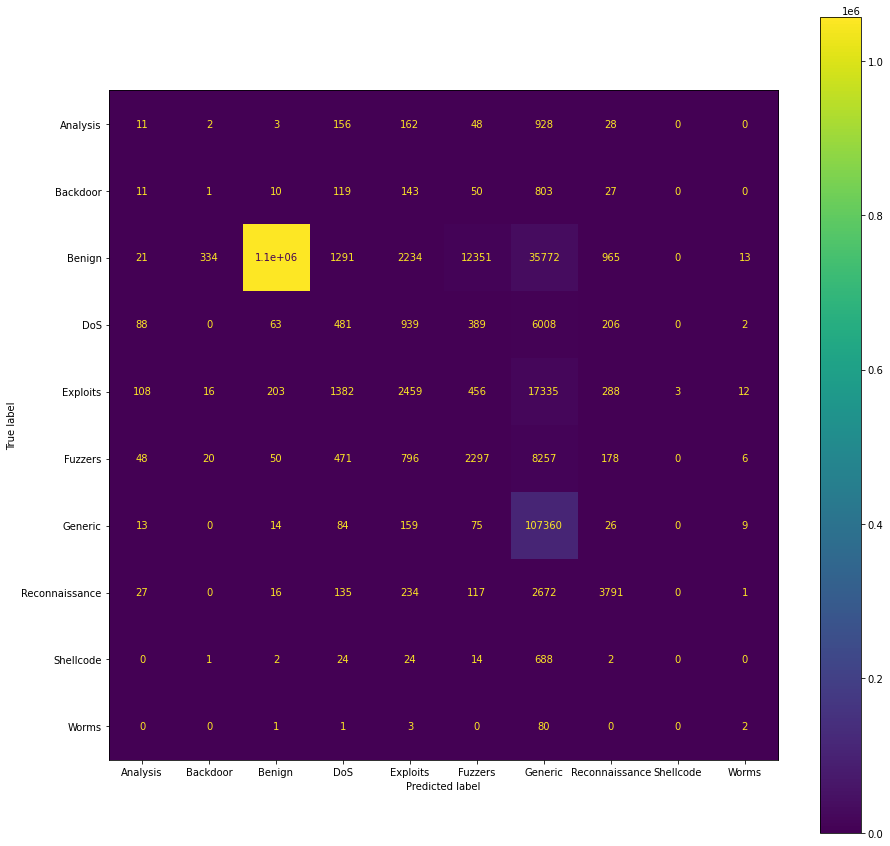

In [68]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)